## Exploration of customer purchasing behavior
- In this notebook we'll see a sales data and will try to do some major EDA and visualizations.


### Importing neccessary libraries and modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore',category=pd.errors.DtypeWarning)
warnings.simplefilter(action='ignore',category=FutureWarning)
os.chdir('..')
from scripts.utils import DataAnalyzer

### Loading the dataset 

In [4]:
store_df=pd.read_csv('C:/Users/abenet/Desktop/data/Week 4/Technical Content/data/store.csv')
train_df=pd.read_csv('C:/Users/abenet/Desktop/data/Week 4/Technical Content/data/train.csv')
test_df=pd.read_csv('C:/Users/abenet/Desktop/data/Week 4/Technical Content/data/test.csv')

In [5]:
#Creating an instance of the class DataAnalyzer
da=DataAnalyzer(store_df,train_df,test_df)

In [6]:
#Updating the train data to include the storetype and assortment
train_df=da.update_data(train_df)

In [11]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment
0,1,5,2015-07-31,5263,555,1,1,No Holiday,1,c,a
1,2,5,2015-07-31,6064,625,1,1,No Holiday,1,a,a
2,3,5,2015-07-31,8314,821,1,1,No Holiday,1,a,a
3,4,5,2015-07-31,13995,1498,1,1,No Holiday,1,c,c
4,5,5,2015-07-31,4822,559,1,1,No Holiday,1,a,a
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,Public Holiday,1,a,a
1017205,1112,2,2013-01-01,0,0,0,0,Public Holiday,1,c,c
1017206,1113,2,2013-01-01,0,0,0,0,Public Holiday,1,a,c
1017207,1114,2,2013-01-01,0,0,0,0,Public Holiday,1,a,c


In [13]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


### Comparing the train and test datasets

2024-09-20 17:05:58,015 - INFO - Loading the bar chart that contains the comparison of two datasets on a column


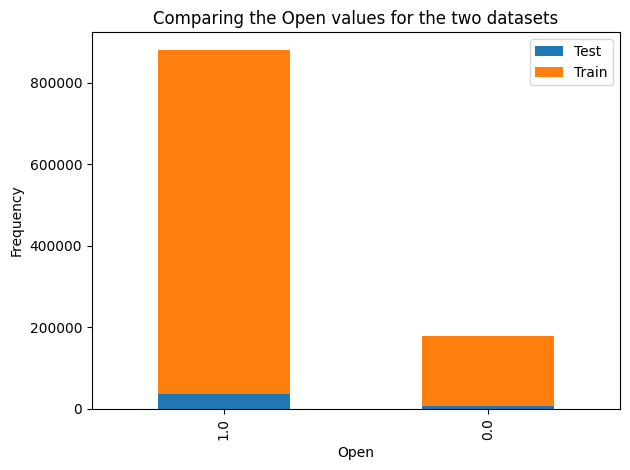

In [8]:
da.compare_and_plot(column='Open')

2024-09-20 12:03:35,580 - INFO - Loading the bar chart that contains the comparison of two datasets on a column


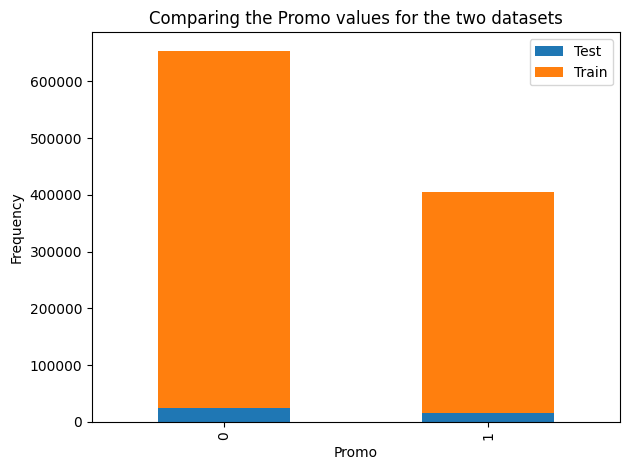

In [9]:
da.compare_and_plot(column='Promo')

* From the above plot we can see that in both cases test data is smaller but is also proportional to the train data when seeing the `Promo` and `Open` column. By dividing the value_counts of the `Promo`, we can see that the proportionality for the `0` value is **0.039** and for the `1` value it is **0.041**. The same is true when we see the `Open` column. These numbers being extremely close validates that the distribution of the train and test datasets are proportional.

### Analyzing the sales and customers info before and after holidays

2024-09-20 12:09:24,782 - INFO - Creating a plot for the Sales column while marking the holidays on that year


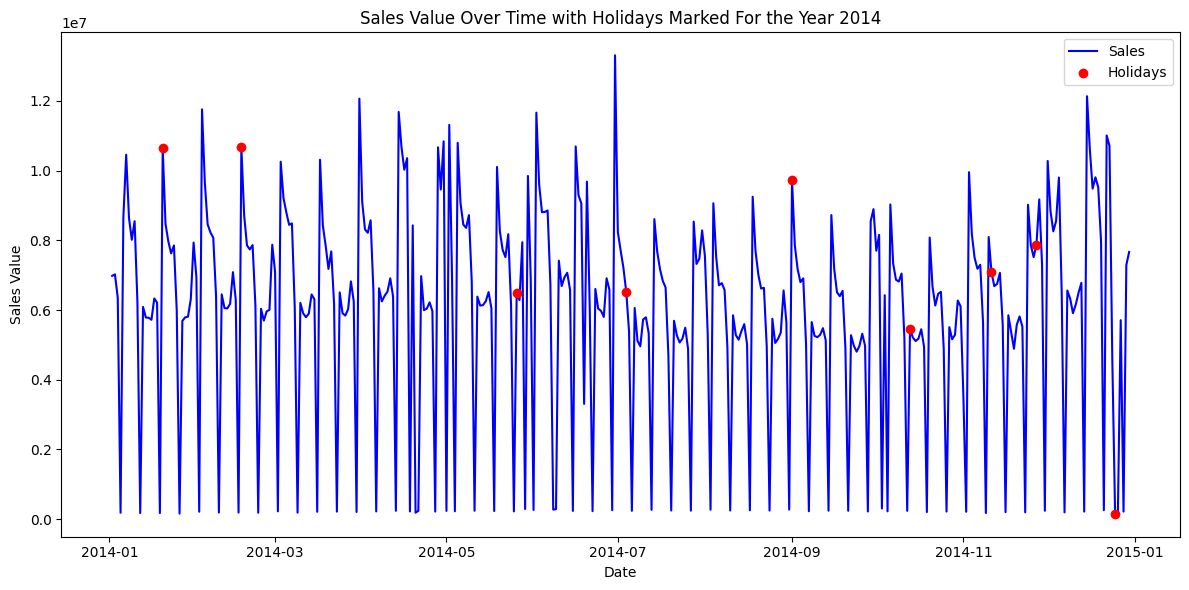

In [7]:
da.plot_holidays(column='Sales',year=2014)

2024-09-20 12:09:51,601 - INFO - Creating a plot for the Customers column while marking the holidays on that year


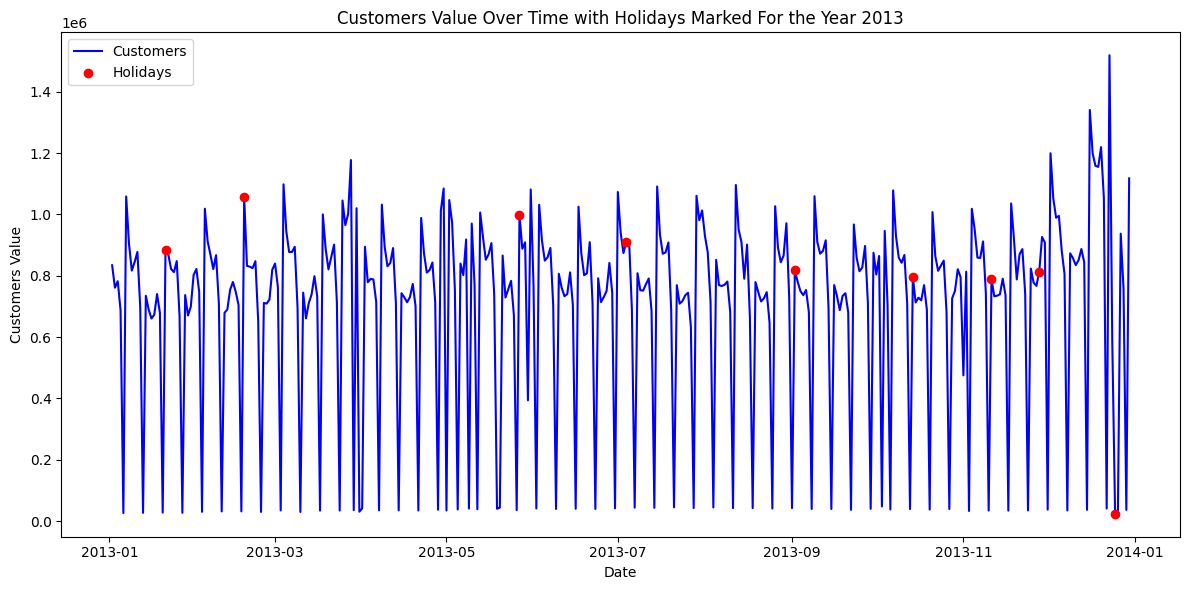

In [8]:
da.plot_holidays(column='Customers',year=2013)

- Based on the plots, it is evident that sales and customer counts begin to rise in the lead-up to holidays, reaching their highest point on the holiday itself before sharply declining afterward. We strongly encourage employees to keep their stores open on all holidays, as these are peak sales days. Some marketing strategies can be:
    * **Holiday Discounts:** Offer special promotions or discounts leading up to and on holidays to attract more customers.
    * **Social Media Campaigns:** Leverage social media platforms to announce holiday sales and engage with customers through festive content.
    * **Flexible Scheduling:** Encourage employees to extend store hours during peak holiday times to accommodate more shoppers.

2024-09-20 12:24:25,580 - INFO - Showing a bar chart that shows the stateholidays distribution on sales


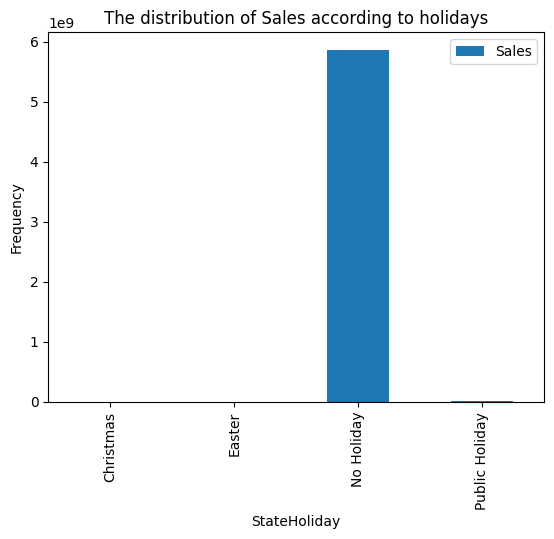

In [6]:
da.plot_stateholidays()

* We can see that the distribution is dominated with **No Holiday**. The next significant Holiday is **Public Holiday**. The sales on **Christmas** and **Easter** are pretty much negligible. 

### Exploring the correlation matrix

In [87]:
train_df[['Sales','Customers']].corr()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


- The correlation between `Sales` and `Customers` is extremely high. This shows us that when there are more customers, there will be more purchase. This is actually true for most businesses but the high value of the correlation here indicates that we can simply increase our purchases by just accumulating more and more customers. The marketing team should work on promotions and discount deals to import customer acquisition. 

### The effect of promotion on Sales

2024-09-20 12:40:00,227 - INFO - Compared the effect of promo on Sales


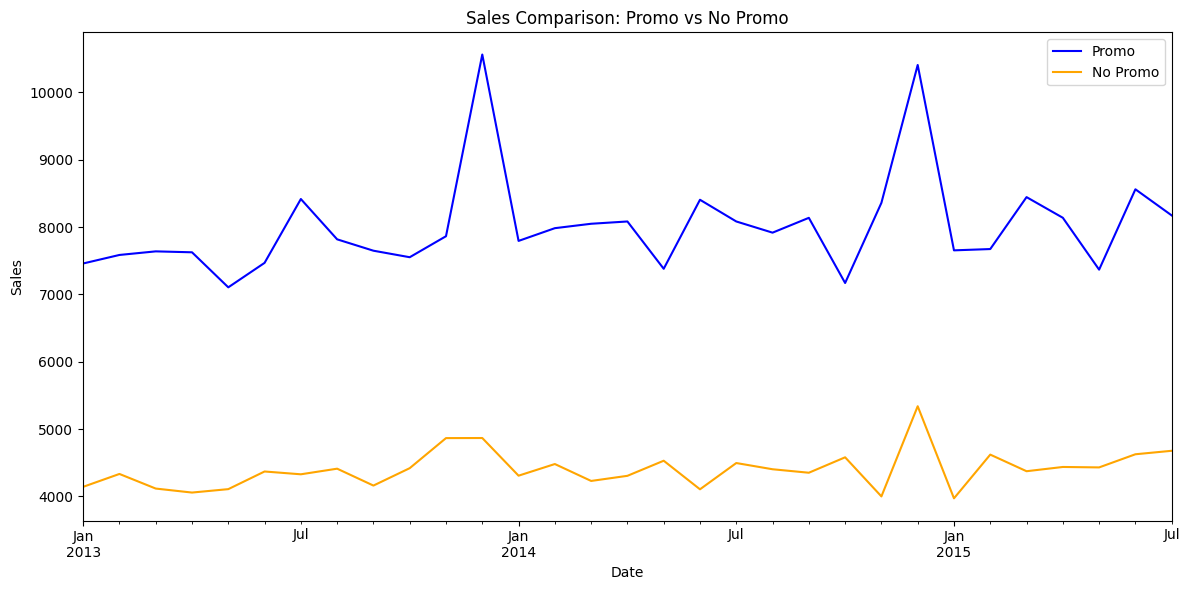

In [7]:
da.plot_promo(column='Sales')

### The effect of promotion on customers

2024-09-20 12:40:27,257 - INFO - Compared the effect of promo on Customers


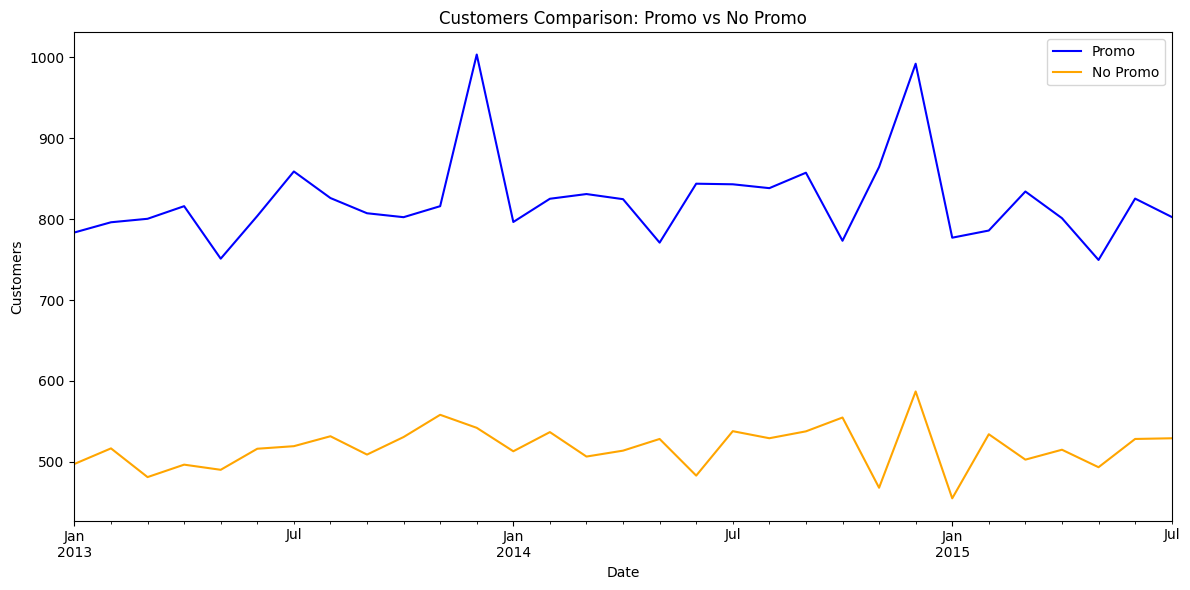

In [8]:
da.plot_promo(column='Customers')

- We can see that promotion is a very effective way to increase both `Sales` and `Customers`. 

### The effectiveness of Promotion on Stores

In [9]:
st=train_df.groupby(['Store','Promo'])['Sales'].sum().reset_index()
st.set_index('Store',inplace=True)
promo=st[st['Promo']==1]
no_promo=st[st['Promo']==0]
promo['Sales']/no_promo['Sales']


Store
1       0.996361
2       1.337359
3       1.342109
4       0.976527
5       1.423888
          ...   
1111    1.287089
1112    1.292938
1113    1.028981
1114    0.922917
1115    1.071773
Name: Sales, Length: 1115, dtype: float64

* This is the unorthodox way to check whether promotions are working or not. All the stores with value greater than 1 benefit from promotion. A value greater than 1 means that sales with promotion is greater than sales with no promotion. But some stores like `4` and `1114` have a value less than 0, which means that they slightly benefit with not having promotion. These shows you there are stores that can accumulate more sales with no promotion. The promotion doesn't work for all stores.

2024-09-20 14:05:04,245 - INFO - Loading the bar chart of sales divided by storetype


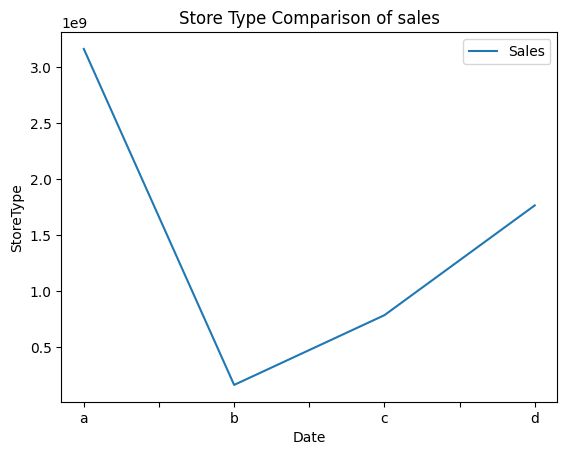

In [6]:
da.plot_storetype()

- From the above plot, we can observe that StoreType `a` has the highest amount of sales. On the other hand, `b` has the lowest sales number. Store type b should learn some promotion or marketing strategies from a to increase its customers and revenue. Since promotion increases sales in most cases, storetype b should increase its promotion days and intervals

In [158]:
train_df[train_df['Open']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType
291,292,5,2015-07-31,0,0,0,1,0,1,a
875,876,5,2015-07-31,0,0,0,1,0,1,a
1406,292,4,2015-07-30,0,0,0,1,0,1,a
1990,876,4,2015-07-30,0,0,0,1,0,1,a
2521,292,3,2015-07-29,0,0,0,1,0,1,a
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a


* As expected, the customers and sales are zero when the time is closing time.

In [11]:
# Determine which stores are open on all weekdays
weekdays = [1,2,3,4,5,6,7]
open_weekdays = train_df[train_df['DayOfWeek'].isin(weekdays)].groupby('Store')['Open'].agg(lambda x: (x == 1).all())
stores_open_all_weekdays = open_weekdays[open_weekdays].index.tolist()
stores_open_all_weekdays

[85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]

2024-09-20 14:29:14,465 - INFO - Plotting the distribution of sales and marking the stores that work on all weekdays


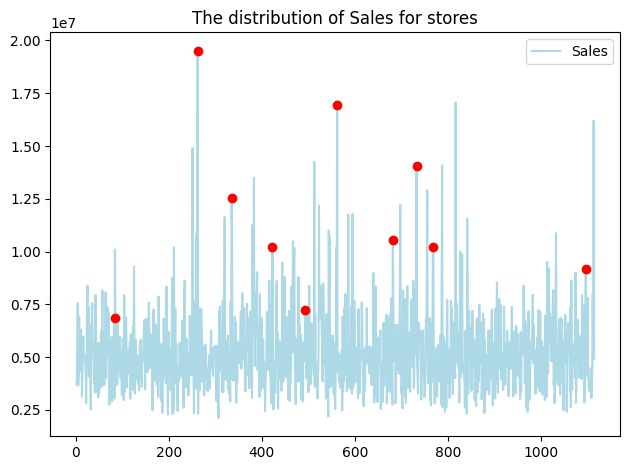

In [15]:
da.plot_weekdays(column='Sales')

2024-09-20 14:29:15,880 - INFO - Plotting the distribution of sales and marking the stores that work on all weekdays


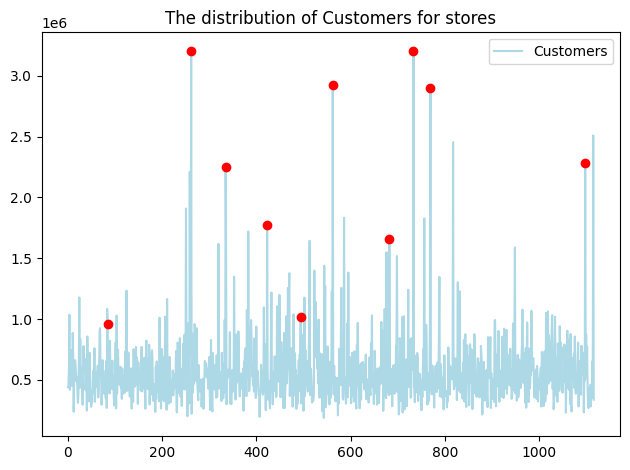

In [16]:
da.plot_weekdays(column='Customers')

* From the above plot we can see that stores that are open on all weedays benefit more by sales(The stores that work on all weekdays are marked by the red marker). The stores that accumulate the most sales work on all weekdays(Store number `262` and `562` can be given as an example). When seeing the customer count, almost all stores that have the most customers work on all weekdays. This shows us the importance of working on the weekends. Almost all stores work from Monday to Friday. But by opening their stores on weekends, stores are benefiting a lot.

Text(0, 0.5, 'Sales')

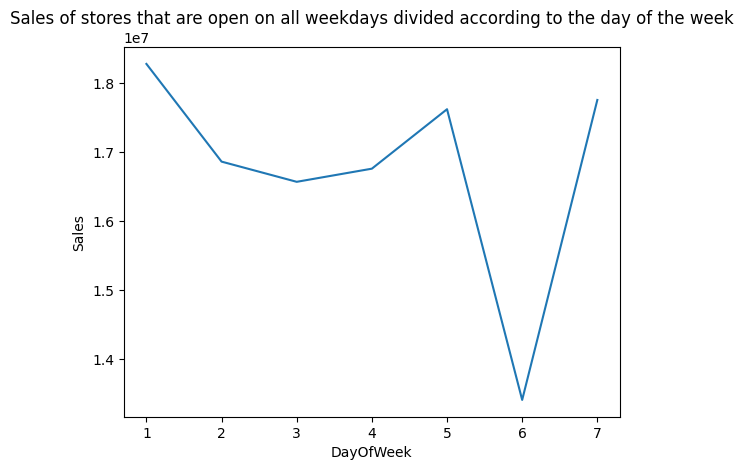

In [12]:
all=train_df[train_df['Store'].isin(stores_open_all_weekdays)]
all.groupby('DayOfWeek')['Sales'].sum().plot()
plt.title(f"Sales of stores that are open on all weekdays divided according to the day of the week")
plt.ylabel('Sales')

- Stores that open on weekends have low revenue count on `Saturdays`. But they get much more than that on `Sundays`. The purchase amount on sunday is as big as monday. This is what makes this stores outstand.

2024-09-20 14:46:49,402 - INFO - The plot of Sales According to the assortment type


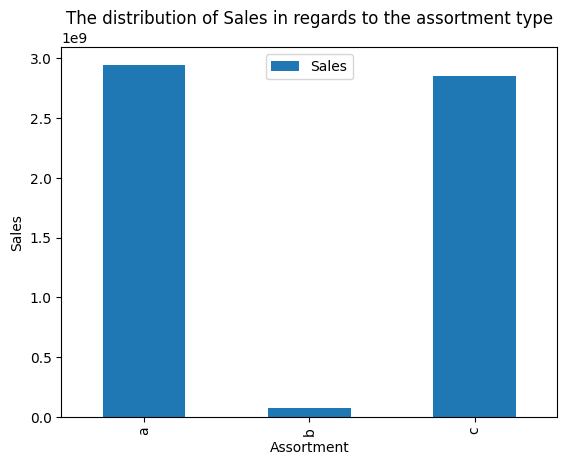

In [5]:
da.plot_assortment()

* Assortment type `b` pulls the lowest revenue while type `a` and `c` bring a much higher revenue to the company. Because of this, the assortment type `b` is not advised for stores 

2024-09-20 21:16:47,120 - INFO - Loading the distribution of Sales according to the competitor


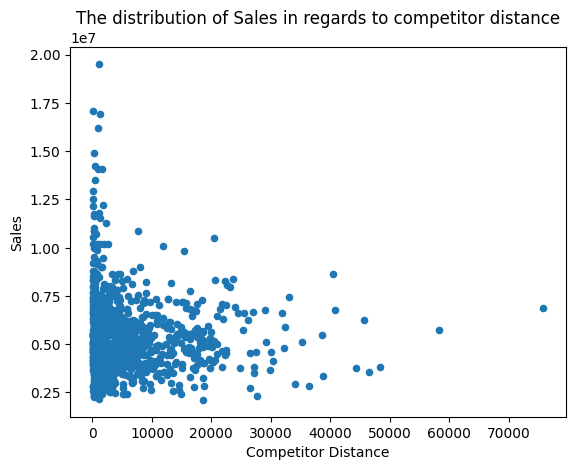

In [13]:
da.plot_competition(column='Sales')

2024-09-20 17:07:54,619 - INFO - Loading the distribution of Sales according to the competitor


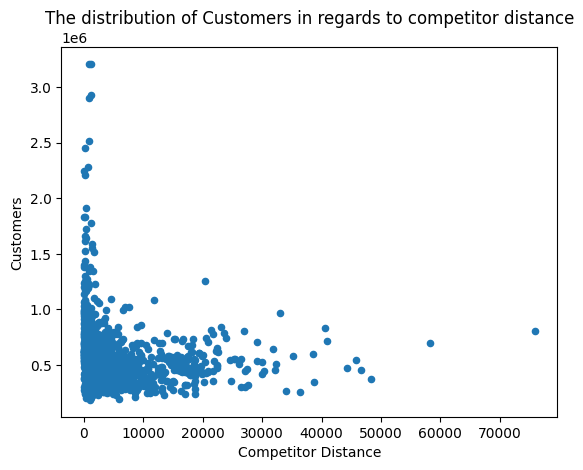

In [7]:
da.plot_competition(column='Customers')

* We can see from the above plots that successful stores have a competitor within the 10,000m margin. The most successful stores have a competitior distance that is close to 0. This means that they are located extremely close. This shows both our store and our competitor's store are located in the same city center. We can confidently say that stores that are in city centers are more successful than the ones outside.Because of this, We advise new stores to be opened next to our competitor since this brings us more customers and sales. This works counterintuitively because the closer the competitor the more sales we get.

<Axes: xlabel='DayOfWeek'>

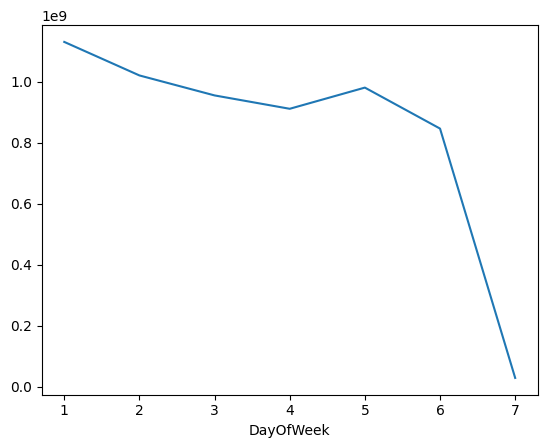

In [10]:
sal=train_df.groupby('DayOfWeek')['Sales'].sum()
sal.plot()

* In general, The day that has the least sales amount in a week is **Sunday**. On the other hand, **Monday** pulls the largest sales number out of all the days in the week.